In [ ]:
import pandas as pd
from collections import Counter
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv('data/프로젝트 데이터_API/상해_본문2.csv')
# Okt 객체 생성
okt = Okt()

# 명사 추출을 위한 리스트 초기화
nouns = []

# 판례내용_정제 열의 각 문서에 대해 명사 추출
for doc in df['판례내용'].iloc[:100]:
    nouns.extend(okt.nouns(doc))

# 명사 빈도 계산
word_freq = Counter(nouns)


# 한글 폰트 경로 지정 (맑음고딕 폰트를 사용한 경우)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 폰트 파일 경로 수정

# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,  # 한글 폰트 경로 설정
                      width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


most_common_words = word_freq.most_common(20)
# most_common_words의 내용을 단어와 빈도로 분리
words, counts = zip(*most_common_words)

# 시각화 (막대 그래프)
plt.figure(figsize=(10, 8))
sns.barplot(x=counts, y=words, palette='viridis', hue=words, dodge=False, legend=False)  # hue로 y 변수 할당
plt.title('Top 50 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


In [8]:
import pickle
from collections import Counter

with open('data/okt.pkl', 'rb') as f:
    normalized = pickle.load(f)
type(normalized[0])

normalized_list = normalized.apply(lambda x: x.split()).tolist()

from itertools import chain

# 리스트 안의 리스트를 하나의 리스트로 평탄화
flattened_list = list(chain.from_iterable(normalized_list))

# 단어 빈도 계산
word_freq = Counter(flattened_list)

NameError: name 'Counter' is not defined

In [2]:
#불용어 읽어오기
stopwords_file_path = 'stopwords_dh_last.txt'
stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]

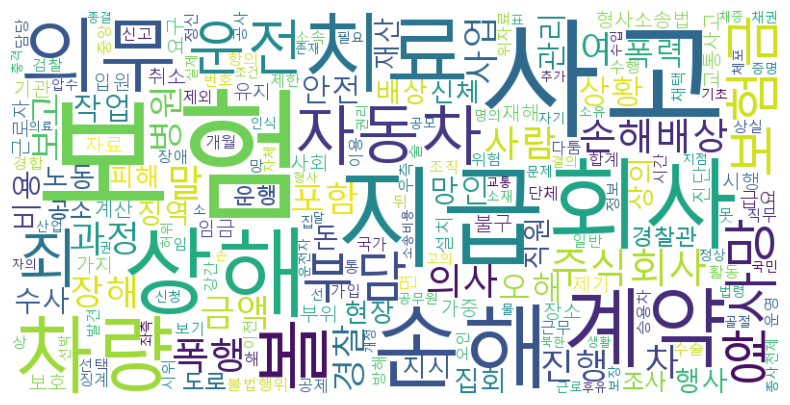

In [13]:
import pandas as pd
from collections import Counter
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle
from collections import Counter

#불용어 읽어오기
stopwords_file_path = 'stopwords_dh_lastlast.txt'
stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]

with open('data/okt.pkl', 'rb') as f:
    normalized = pickle.load(f)

normalized_list = normalized.apply(lambda x: x.split()).tolist()

from itertools import chain

# 리스트 안의 리스트를 하나의 리스트로 평탄화
flattened_list = list(chain.from_iterable(normalized_list))

# 불용어를 제거한 리스트 생성
filtered_list = [word for word in flattened_list if word not in stopwords]

# 단어 빈도 계산
word_freq = Counter(filtered_list)

# 한글 폰트 경로 지정 (맑음고딕 폰트를 사용한 경우)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 폰트 파일 경로 수정

# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,  # 한글 폰트 경로 설정
                      width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()